In [1]:
#Import dependecies
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from datetime import datetime as dt
import seaborn as sns

### Extract the relevant data and rename column headers for consistency ###

In [2]:
#Extract data from csvs on carbon metrics from 2020
carbon_df = pd.read_csv('input_data/carbon.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
carbon_df = carbon_df.rename(columns ={'carbon_city': 'city', 'carbon_county': 'county'})

# Convert date from object to datetime format
carbon_df["carbon_date"] = pd.to_datetime(carbon_df["carbon_date"], format='mixed')

carbon_df.head()

,city,county,carbon_mean,carbon_method,carbon_site,carbon_date
0,Redwood City,San Mateo,0.373913,INSTRUMENTAL - NONDISPERSIVE INFRARED,1001,2020-01-01
1,Redwood City,San Mateo,0.550000,INSTRUMENTAL - NONDISPERSIVE INFRARED,1001,2020-01-02
2,Redwood City,San Mateo,0.673913,INSTRUMENTAL - NONDISPERSIVE INFRARED,1001,2020-01-03
3,Redwood City,San Mateo,0.447826,INSTRUMENTAL - NONDISPERSIVE INFRARED,1001,2020-01-04
4,Redwood City,San Mateo,0.395652,INSTRUMENTAL - NONDISPERSIVE INFRARED,1001,2020-01-05


In [3]:
print(carbon_df.dtypes)

city                     object
county                   object
carbon_mean             float64
carbon_method            object
carbon_site               int64
carbon_date      datetime64[ns]
dtype: object


In [4]:
#Extract data from csvs on nitrogen metrics from 2020
nitrogen_df = pd.read_csv('input_data/nitrogen1.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
nitrogen_df = nitrogen_df.rename(columns ={'nitrogen_city': 'city', 'nitrogen_county': 'county'})

# Convert date from object to datetime format
nitrogen_df["nitrogen_date"] = pd.to_datetime(nitrogen_df["nitrogen_date"], format='mixed')

nitrogen_df.head()

,city,county,nitrogen_mean,nitrogen_method,nitrogen_site,nitrogen_date
0,Redwood City,San Mateo,7.382609,INSTRUMENTAL - CHEMILUMINESCENCE,1001,2020-01-01
1,Redwood City,San Mateo,14.572727,INSTRUMENTAL - CHEMILUMINESCENCE,1001,2020-01-02
2,Redwood City,San Mateo,17.608696,INSTRUMENTAL - CHEMILUMINESCENCE,1001,2020-01-03
3,Redwood City,San Mateo,13.047826,INSTRUMENTAL - CHEMILUMINESCENCE,1001,2020-01-04
4,Redwood City,San Mateo,10.252174,INSTRUMENTAL - CHEMILUMINESCENCE,1001,2020-01-05


In [5]:
#Extract data from csvs on ozone metrics from 2020
ozone_df = pd.read_csv('input_data/ozone1.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
ozone_df = ozone_df.rename(columns ={'ozone_city': 'city', 'ozone_county': 'county'})

# Convert date from object to datetime format
ozone_df["ozone_date"] = pd.to_datetime(ozone_df["ozone_date"], format='mixed')

ozone_df.head()

,city,county,ozone_mean,ozone_method,ozone_site,ozone_date
0,San Francisco,San Francisco,0.019130,INSTRUMENTAL - ULTRA VIOLET,5,2020-01-01
1,San Francisco,San Francisco,0.009000,INSTRUMENTAL - ULTRA VIOLET,5,2020-01-02
2,San Francisco,San Francisco,0.009217,INSTRUMENTAL - ULTRA VIOLET,5,2020-01-03
3,San Francisco,San Francisco,0.023087,INSTRUMENTAL - ULTRA VIOLET,5,2020-01-04
4,San Francisco,San Francisco,0.025783,INSTRUMENTAL - ULTRA VIOLET,5,2020-01-05


In [6]:
#Extract data from csvs on particulate matter 10 (with a diameter of 10 microns or less ) metrics from 2020
pm10_df = pd.read_csv('input_data/pm10_1.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
pm10_df = pm10_df.rename(columns ={'10_city': 'city', '10_county': 'county'})

# Convert date from object to datetime format
pm10_df["pm_10_date"] = pd.to_datetime(pm10_df["pm_10_date"], format='mixed')

pm10_df.head()

,city,county,10_mean,10_method,10_site,pm_10_date
0,San Francisco,San Francisco,17.0,HI-VOL SA/GMW-1200 - GRAVIMETRIC,5,2020-02-09
1,San Francisco,San Francisco,14.0,HI-VOL SA/GMW-1200 - GRAVIMETRIC,5,2020-01-04
2,San Francisco,San Francisco,9.0,HI-VOL SA/GMW-1200 - GRAVIMETRIC,5,2020-01-16
3,San Francisco,San Francisco,20.0,HI-VOL SA/GMW-1200 - GRAVIMETRIC,5,2020-01-28
4,San Francisco,San Francisco,29.0,HI-VOL SA/GMW-1200 - GRAVIMETRIC,5,2020-02-21


In [7]:
#Extract data from csvs on particulate matter 25 (with a diameter of 25 microns or less) metrics from 2020
pm25_df = pd.read_csv('input_data/pm25_1.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
pm25_df = pm25_df.rename(columns ={'25_city': 'city', '25_county': 'county'})

# Convert date from object to datetime format
pm25_df["pm_25_date"] = pd.to_datetime(pm25_df["pm_25_date"], format='mixed')

pm25_df.head()

,city,county,25_mean,25_method,25_site,pm_25_date
0,Roseville,Placer,23.0,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,6,2020-01-04
1,Roseville,Placer,4.8,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,6,2020-01-16
2,Roseville,Placer,5.9,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,6,2020-01-28
3,Roseville,Placer,2.2,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,6,2020-02-09
4,Roseville,Placer,12.6,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,6,2020-02-21


In [8]:
#Extract data from csvs on sulfur metrics from 2020
sulfur_df = pd.read_csv('input_data/sulfur1.csv')

# Rename first column to 'city' for common primary key and county column as well for consistency
sulfur_df = sulfur_df.rename(columns ={'sulfur_city': 'city', 'sulfur_county': 'county'})

# Convert date from object to datetime format
sulfur_df["sulfur_date"] = pd.to_datetime(sulfur_df["sulfur_date"], format='mixed')

sulfur_df.head()

,city,county,sulfur_mean,sulfur_method,sulfur_site,sulfur_date
0,Vallejo,Solano,0.968182,INSTRUMENTAL - PULSED FLUORESCENT,4,2020-01-01
1,Vallejo,Solano,1.031818,INSTRUMENTAL - PULSED FLUORESCENT,4,2020-01-02
2,Vallejo,Solano,0.936364,INSTRUMENTAL - PULSED FLUORESCENT,4,2020-01-03
3,Vallejo,Solano,0.886364,INSTRUMENTAL - PULSED FLUORESCENT,4,2020-01-04
4,Vallejo,Solano,0.800000,INSTRUMENTAL - PULSED FLUORESCENT,4,2020-01-05


### Calculate the median AQI for all pollutant types by month ###

In [9]:
# Calculate the median AQI for all pollutant types by month
#Carbon
carbon_jan = carbon_df[(carbon_df['carbon_date'] >= '2020-01-01') & (carbon_df['carbon_date'] <= '2020-01-31')]
median_carbon_jan = carbon_jan['carbon_mean'].median()
#print(median_carbon_jan)

In [10]:
# Create an empty DataFrame to store the results for median carbon by month
median_carbon_by_month_by_city = []

# Get the list of unique cities
cities = carbon_df['city'].unique()

# Loop through each city
for city in cities:
    # Loop through each month in 2020
    for month in range(1, 13):
        start_date = f'2020-{month:02d}-01'
        end_date = pd.to_datetime(start_date).replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)
        
        # Filter data for the specified city and month
        carbon_month_city = carbon_df[(carbon_df['city'] == city) &
                                      (carbon_df['carbon_date'] >= start_date) &
                                      (carbon_df['carbon_date'] <= end_date)]
        
        # Calculate the median AQI for carbon
        median_carbon = carbon_month_city['carbon_mean'].median()
        
        # Append the result to the list
        median_carbon_by_month_by_city.append({'city': city, 'month': start_date, 'carbon median': median_carbon})

#Convert the list to a DataFrame
median_carbon_by_month_by_city = pd.DataFrame(median_carbon_by_month_by_city)

# Display the median AQI for carbon for each month in 2020
median_carbon_by_month_by_city

# Sort alphabetically by city
carbon_sort_df = median_carbon_by_month_by_city.sort_values(by= 'city')

# Export csv with monthly carbon levels by city
carbon_sort_df.to_csv('output_data/carbon_monthly.csv')

In [11]:
# Create an empty DataFrame to store the results for median nitrogen by month
median_nitrogen_by_month_by_city = []

# Get the list of unique cities
cities = nitrogen_df['city'].unique()

# Loop through each city
for city in cities:
    # Loop through each month in 2020
    for month in range(1, 13):
        start_date = f'2020-{month:02d}-01'
        end_date = pd.to_datetime(start_date).replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)
        
        # Filter data for the specified month
        nitrogen_month = nitrogen_df[(nitrogen_df['nitrogen_date'] >= start_date) & (nitrogen_df['nitrogen_date'] <= end_date)]
        
        # Calculate the median AQI
        median_nitrogen = nitrogen_month['nitrogen_mean'].median()
        
        # Append the result to the list
        median_nitrogen_by_month_by_city.append({'city': city,'month': start_date, 'nitrogen median': median_nitrogen})

#Convert the list to a DataFrame
median_nitrogen_by_month_by_city = pd.DataFrame(median_nitrogen_by_month_by_city)

# Display the median AQI for each month in 2020
median_nitrogen_by_month_by_city

# Sort alphabetically by city
nitrogen_sort_df = median_nitrogen_by_month_by_city.sort_values(by= 'city')

# Export csv with monthly nitrogen levels by city
nitrogen_sort_df.to_csv('output_data/nitrogen_monthly.csv')
nitrogen_sort_df

,city,month,nitrogen median
196,Bethel Island,2020-05-01,3.404348
203,Bethel Island,2020-12-01,12.571739
202,Bethel Island,2020-11-01,10.923913
201,Bethel Island,2020-10-01,9.834783
200,Bethel Island,2020-09-01,6.767391
...,...,...,...
33,Vallejo,2020-10-01,9.834783
34,Vallejo,2020-11-01,10.923913
35,Vallejo,2020-12-01,12.571739
26,Vallejo,2020-03-01,5.833300


In [12]:
# Create an empty DataFrame to store the results for median ozone by month
median_ozone_by_month_by_city = []

# Get the list of unique cities
cities = ozone_df['city'].unique()

# Loop through each city
for city in cities:
    # Loop through each month in 2020
    for month in range(1, 13):
        start_date = f'2020-{month:02d}-01'
        end_date = pd.to_datetime(start_date).replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)
        
        # Filter data for the specified month
        ozone_month = ozone_df[(ozone_df['ozone_date'] >= start_date) & (ozone_df['ozone_date'] <= end_date)]
        
        # Calculate the median AQI
        median_ozone = ozone_month['ozone_mean'].median()
        
        # Append the result to the list
        median_ozone_by_month_by_city.append({'city': city,'month': start_date, 'ozone median': median_ozone})

#Convert the list to a DataFrame
median_ozone_by_month_by_city = pd.DataFrame(median_ozone_by_month_by_city)

# Display the median AQI for ozone for each month in 2020
median_ozone_by_month_by_city

# Sort alphabetically by city
ozone_sort_df = median_ozone_by_month_by_city.sort_values(by= 'city')

# Export csv with monthly ozone levels by city
ozone_sort_df.to_csv('output_data/ozone_monthly.csv')
ozone_sort_df

,city,month,ozone median
382,Arden-Arcade,2020-11-01,0.019083
372,Arden-Arcade,2020-01-01,0.017304
373,Arden-Arcade,2020-02-01,0.024783
374,Arden-Arcade,2020-03-01,0.029000
375,Arden-Arcade,2020-04-01,0.029304
...,...,...,...
318,Woodland,2020-07-01,0.026212
317,Woodland,2020-06-01,0.026340
316,Woodland,2020-05-01,0.030471
314,Woodland,2020-03-01,0.029000


In [13]:
# Create an empty DataFrame to store the results for median pm10 by month
median_pm10_by_month_by_city = []

# Get the list of unique cities
cities = pm10_df['city'].unique()

# Loop through each city
for city in cities:
    # Loop through each month in 2020
    for month in range(1, 13):
        start_date = f'2020-{month:02d}-01'
        end_date = pd.to_datetime(start_date).replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)
        
        # Filter data for the specified month
        pm10_month = pm10_df[(pm10_df['pm_10_date'] >= start_date) & (pm10_df['pm_10_date'] <= end_date)]
        
        # Calculate the median
        median_pm10 = pm10_month['10_mean'].median()
        
        # Append the result to the list
        median_pm10_by_month_by_city.append({'city': city,'month': start_date, 'pm10 median': median_pm10})

#Convert the list to a DataFrame
median_pm10_by_month_by_city = pd.DataFrame(median_pm10_by_month_by_city)

# Display the median AQI for pm10 for each month in 2020
median_pm10_by_month_by_city

# Sort alphabetically by city
pm10_sort_df = median_pm10_by_month_by_city.sort_values(by= 'city')

# Export csv with monthly pm10 levels by city
pm10_sort_df.to_csv('output_data/pm10_monthly.csv')
pm10_sort_df

,city,month,pm10 median
83,Arden-Arcade,2020-12-01,18.000000
72,Arden-Arcade,2020-01-01,10.854167
73,Arden-Arcade,2020-02-01,16.298008
74,Arden-Arcade,2020-03-01,8.000000
75,Arden-Arcade,2020-04-01,11.750000
...,...,...,...
12,Woodland,2020-01-01,10.854167
23,Woodland,2020-12-01,18.000000
22,Woodland,2020-11-01,21.416666
15,Woodland,2020-04-01,11.750000


In [14]:
# Create an empty DataFrame to store the results for median pm25 by month
median_pm25_by_month_by_city = []

# Get the list of unique cities
cities = pm25_df['city'].unique()

# Loop through each city
for city in cities:
    # Loop through each month in 2020
    for month in range(1, 13):
        start_date = f'2020-{month:02d}-01'
        end_date = pd.to_datetime(start_date).replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)
        
        # Filter data for the specified month
        pm25_month = pm25_df[(pm25_df['pm_25_date'] >= start_date) & (pm25_df['pm_25_date'] <= end_date)]
        
        # Calculate the median
        median_pm25 = pm25_month['25_mean'].median()
        
        # Append the result to the list
        median_pm25_by_month_by_city.append({'city': city,'month': start_date, 'pm25 median': median_pm25})

#Convert the list to a DataFrame
median_pm25_by_month_by_city = pd.DataFrame(median_pm25_by_month_by_city)

# Display the median AQI for pm25 for each month in 2020
median_pm25_by_month_by_city

# Sort alphabetically by city
pm25_sort_df = median_pm25_by_month_by_city.sort_values(by= 'city')

# Export csv with monthly pm25 levels by city
pm25_sort_df.to_csv('output_data/pm25_monthly.csv')
pm25_sort_df

,city,month,pm25 median
42,Arden-Arcade,2020-07-01,6.400000
41,Arden-Arcade,2020-06-01,5.291667
47,Arden-Arcade,2020-12-01,9.600000
46,Arden-Arcade,2020-11-01,7.700000
44,Arden-Arcade,2020-09-01,16.042572
...,...,...,...
51,Woodland,2020-04-01,4.700000
50,Woodland,2020-03-01,4.300000
49,Woodland,2020-02-01,8.000000
48,Woodland,2020-01-01,6.800000


### After calculating monthly median for all pollutants, import the income csv, merge dataFrames, and run a regression on AQI with income as the independent variable ###

In [15]:
#Import income data and convert to a pandas dataFrame
income_df = pd.read_csv('input_data/ACS_income_data_bayarea2020.csv')
income_df

,city,2020median_income
0,Atherton,256366.0
1,Hillsborough,256366.0
2,Los Altos Hills,256366.0
3,Monte Sereno,256366.0
4,Piedmont,256366.0
...,...,...
97,Calistoga,72760.0
98,Rio Vista,71662.0
99,Yountville,67187.0
100,San Pablo,62367.0


In [16]:
# Merge income_df with pm10_df on "city"
pm10_income_merged_df = pm10_sort_df.merge(income_df, on='city', how= 'inner')
pm10_income_merged_df.to_csv('output_data/income_pm10_merged.csv')

# Merge income_df with carbon on "city"
carbon_income_merged_df = carbon_sort_df.merge(income_df, on='city', how= 'inner')
carbon_income_merged_df.to_csv('output_data/income_carbon_merged.csv')

# Merge income_df with pm25_df on "city"
pm25_income_merged_df = pm25_sort_df.merge(income_df, on='city', how= 'inner')
pm25_income_merged_df.to_csv('output_data/income_pm25_merged.csv')

# Merge income_df with ozone on "city'
ozone_income_merged_df = ozone_sort_df.merge(income_df, on='city', how= 'inner')
ozone_income_merged_df.to_csv('output_data/income_ozone_merged.csv')

# Merge income_df with ozone on "city'
nitrogen_income_merged_df = nitrogen_sort_df.merge(income_df, on='city', how= 'inner')
nitrogen_income_merged_df.to_csv('output_data/income_nitrogen_merged.csv')

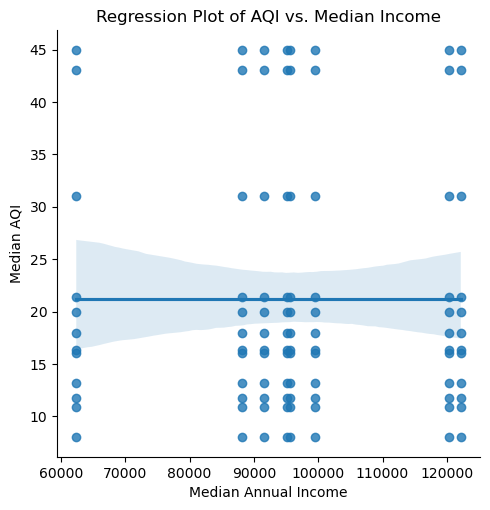

In [17]:
import seaborn as sns

# Regression plot
sns.lmplot(data= pm10_income_merged_df, x='2020median_income', y='pm10 median')
plt.title('Regression Plot of AQI vs. Median Income')
plt.xlabel('Median Annual Income')
plt.ylabel('Median AQI')
plt.show()

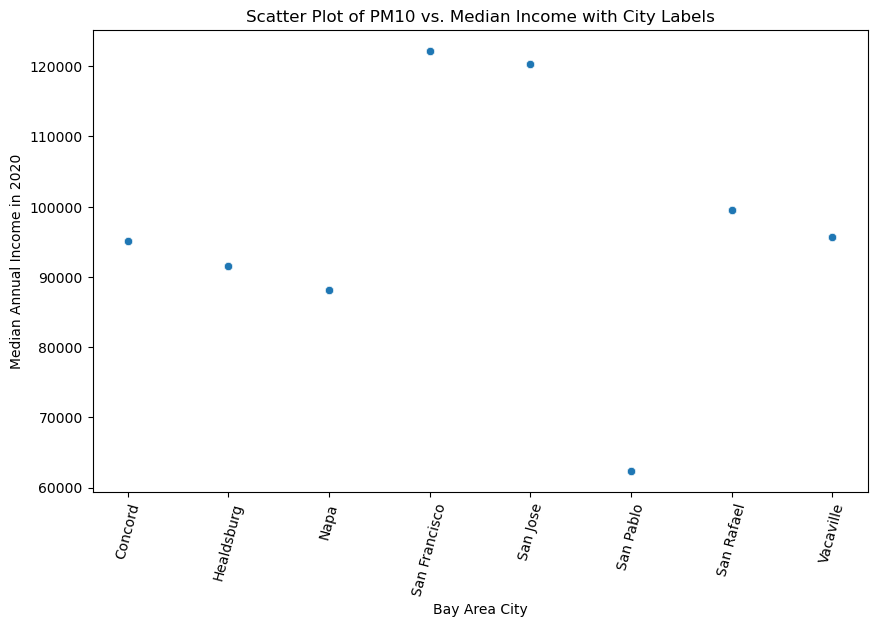

In [23]:
# Create scatter plot for PM10
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= pm10_income_merged_df, 
    x='city',
    y='2020median_income',
    sizes=(50, 200), 
    legend=True
)

# Set plot labels and title
plt.xlabel('Bay Area City')
plt.xticks(rotation= 75)
plt.ylabel('Median Annual Income in 2020')
plt.title('Scatter Plot of PM10 vs. Median Income with City Labels')

# Show plot
plt.show()

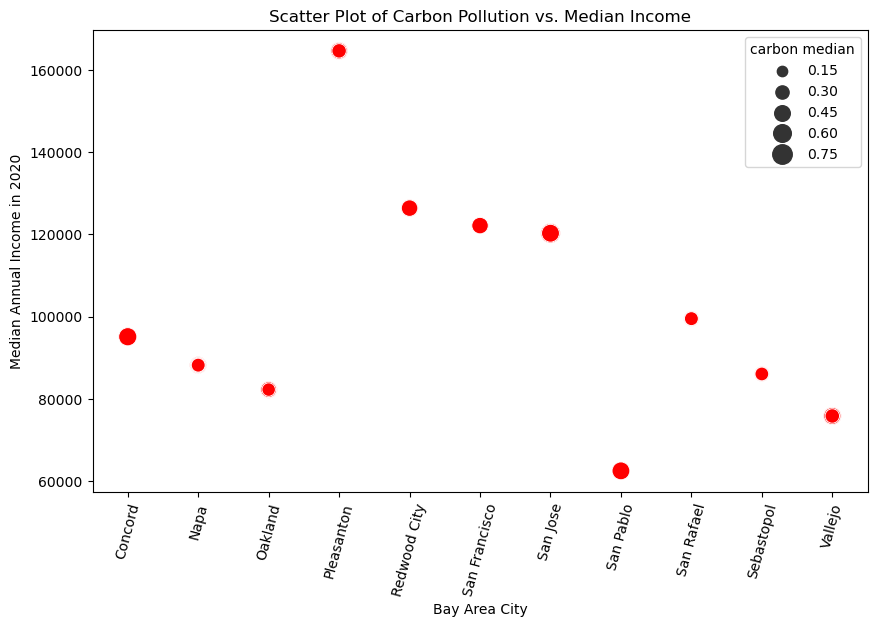

In [19]:
# Create scatter plot for carbon 
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= carbon_income_merged_df, 
    x='city',
    y='2020median_income',
    size='carbon median', 
    sizes=(50, 200), 
    legend=True,
    color='red'
)

# Set plot labels and title
plt.xlabel('Bay Area City')
plt.xticks(rotation= 75)
plt.ylabel('Median Annual Income in 2020')
plt.title('Scatter Plot of Carbon Pollution vs. Median Income')

# Show plot
plt.show()

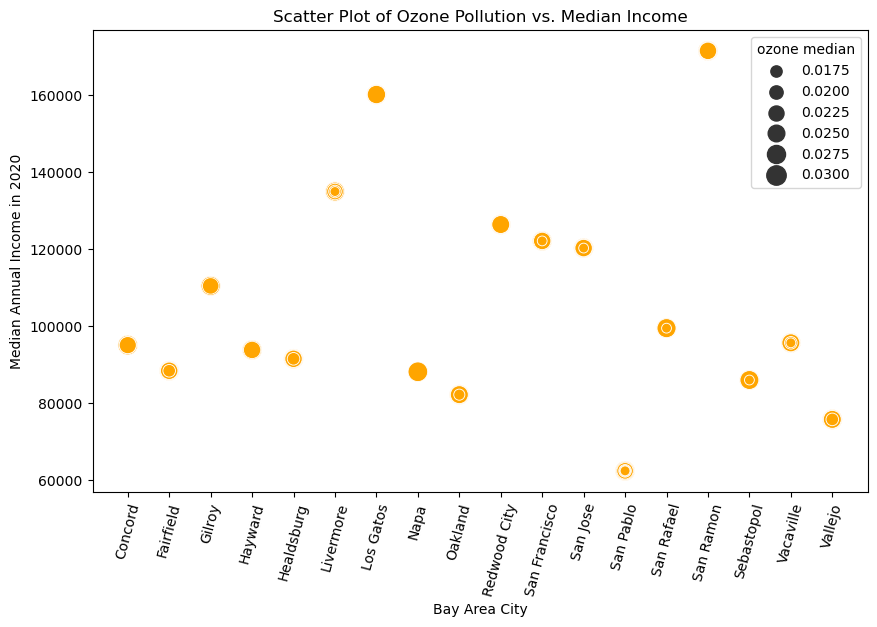

In [20]:
# Create scatter plot for ozone 
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= ozone_income_merged_df, 
    x='city',
    y='2020median_income',
    size='ozone median', 
    sizes=(50, 200), 
    legend=True,
    color='orange'
)

# Set plot labels and title
plt.xlabel('Bay Area City')
plt.xticks(rotation= 75)
plt.ylabel('Median Annual Income in 2020')
plt.title('Scatter Plot of Ozone Pollution vs. Median Income')

# Show plot
plt.show()

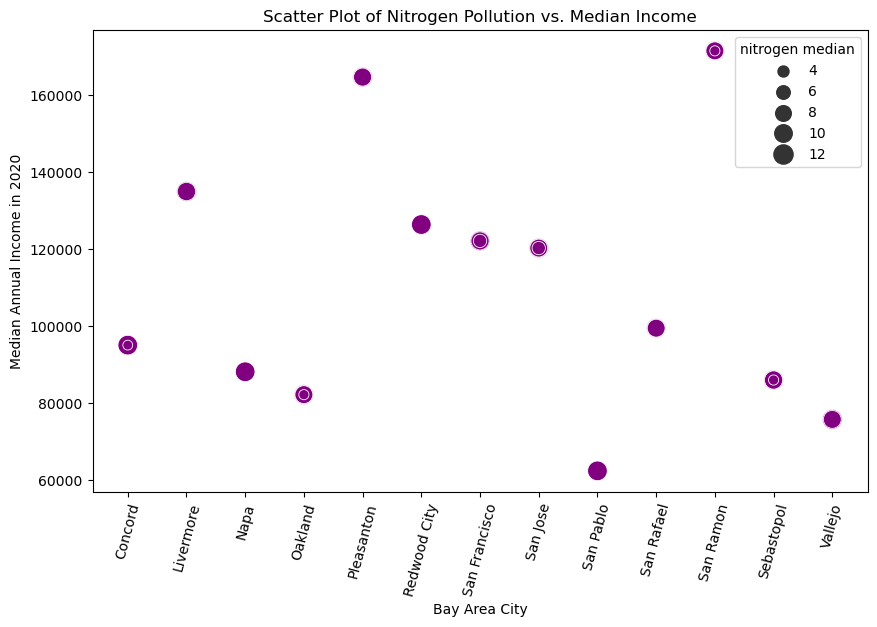

In [21]:
# Create scatter plot for nitrogen 
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= nitrogen_income_merged_df, 
    x='city',
    y='2020median_income',
    size='nitrogen median', 
    sizes=(50, 200), 
    legend=True,
    color='purple'
)

# Set plot labels and title
plt.xlabel('Bay Area City')
plt.xticks(rotation= 75)
plt.ylabel('Median Annual Income in 2020')
plt.title('Scatter Plot of Nitrogen Pollution vs. Median Income')

# Show plot
plt.show()

/Users/celinakamler/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


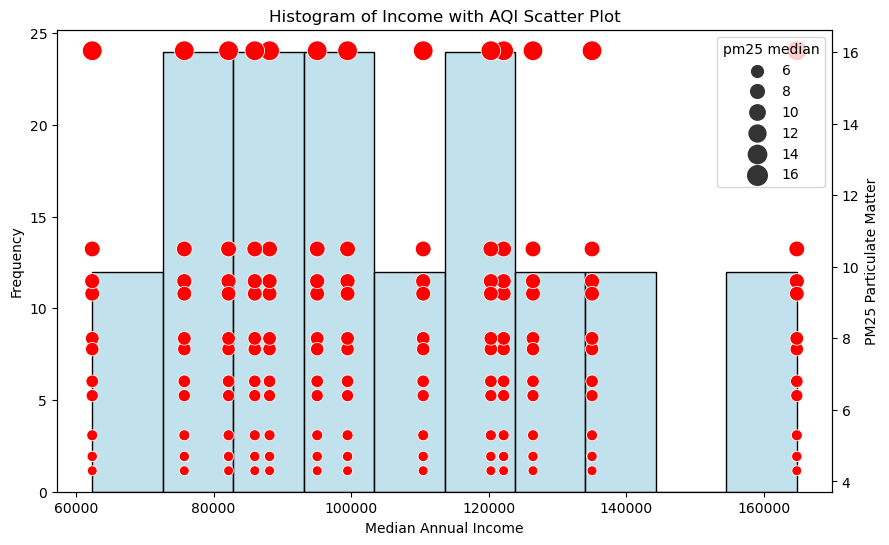

In [22]:
#Scatterplot of AQI over histogram if income

# Replace infinite values with NaN
pm25_income_merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in 'pm10' and 'median_income'
pm25_income_merged_df.dropna(subset=['pm25 median', '2020median_income'], inplace=True)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot histogram of median income
sns.histplot(pm25_income_merged_df['2020median_income'], bins=10, color='lightblue', kde=False)
ax1.set_xlabel('Median Annual Income')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Income with AQI Scatter Plot')

# Create a secondary y-axis to overlay the scatter plot
ax2 = ax1.twinx()

# Plot scatter plot of AQI with city labels
scatter = sns.scatterplot(
    data= pm25_income_merged_df, 
    x='2020median_income', 
    y='pm25 median', 
    size='pm25 median',
    sizes=(50, 200), 
    legend=True, 
    ax=ax2,
    color='red'
)

# # Add city labels to the scatter plot
# for i in range(pm25_income_merged_df.shape[0]):
#     ax2.text(
#         pm25_income_merged_df['2020median_income'][i], 
#         pm25_income_merged_df['pm25 median'][i], 
#         pm25_income_merged_df['city'][i],
#         fontsize=12, 
#         ha='right', 
#         va='bottom'
#     )

# Set the y-axis label for the scatter plot
ax2.set_ylabel('PM25 Particulate Matter')

# Show plot
plt.show()